In [1]:
import matplotlib.pyplot as plt
import cv2
import glob
import json
import numpy as np


def json_visualize(language, id, type = 'train'):
    data_path = '/data/ephemeral/home/code/data/'
    image_files = glob.glob(data_path + language +'_receipt/img/' + type + '/*.jpg')
    img = cv2.imread(image_files[id])

    json_path = data_path + language +'_receipt/ufo/' + type + '.json'
    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    image_name = image_files[id].split('/')[-1]
    
    for word in jf['images'][image_name]['words'].keys():
        points_list = []
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)
        cv2.polylines(img, np.int32(points_list), True, (0,0,255), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


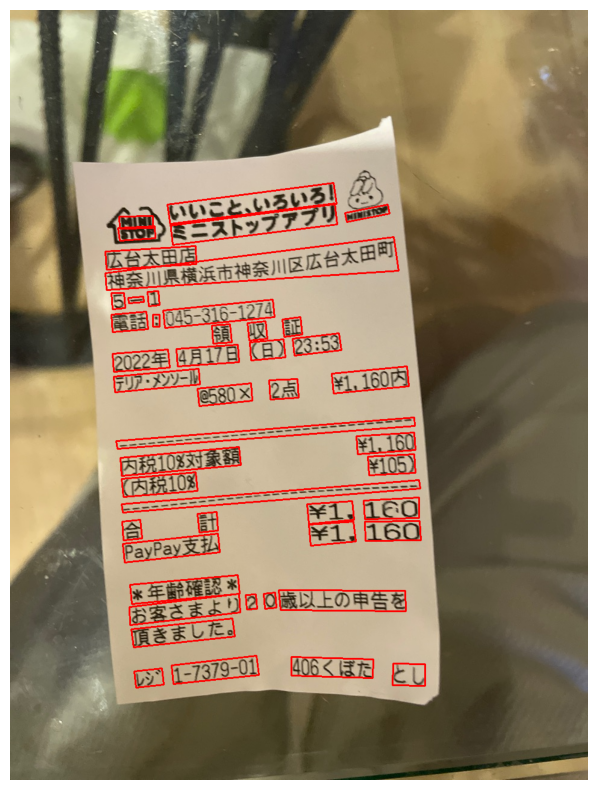

In [2]:
json_visualize(language='japanese', id=0)

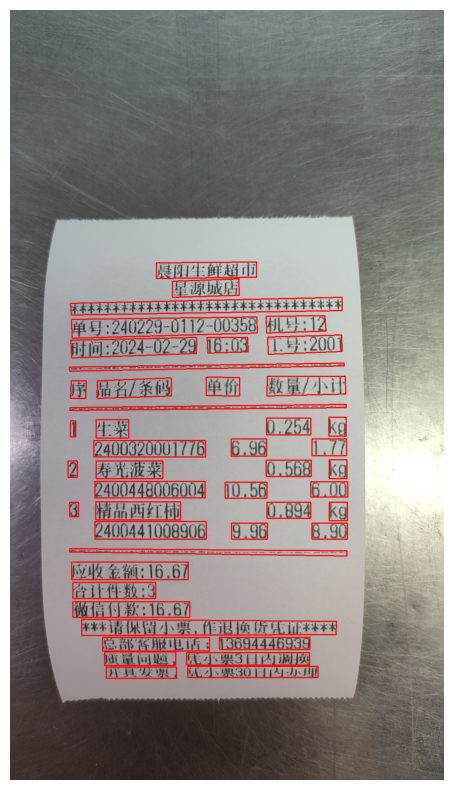

In [3]:
json_visualize(language='chinese', id=0)

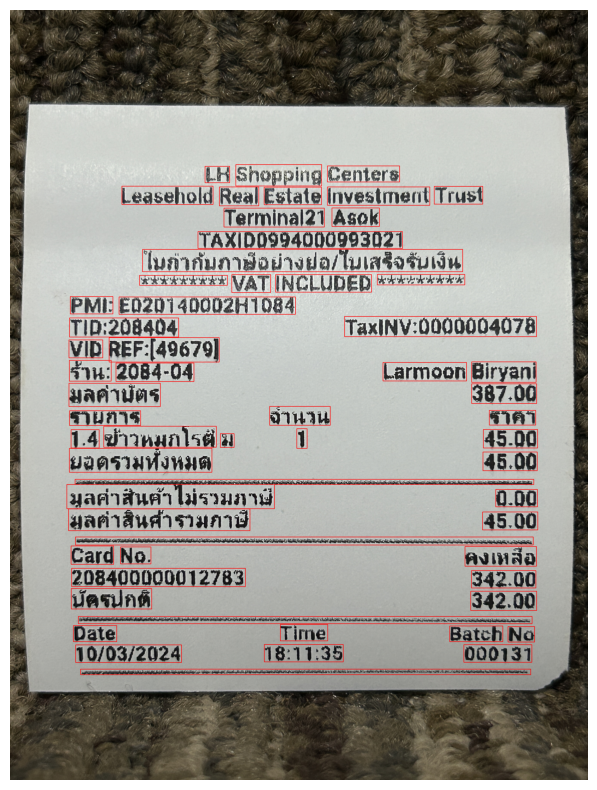

In [5]:
json_visualize(language='thai', id=0)

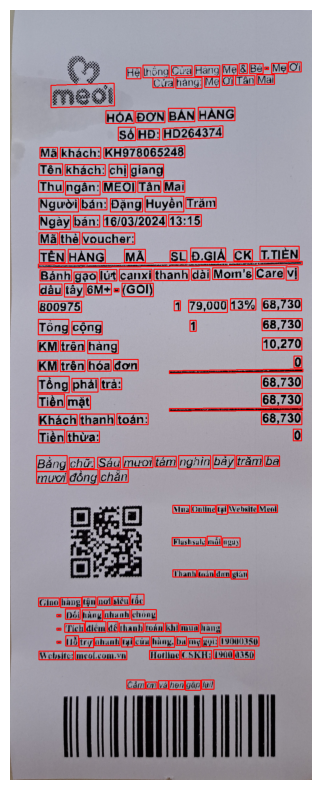

In [7]:
json_visualize(language='vietnamese', id=0)

In [8]:
def csv_visualize(language, id, type = 'test'):
    data_path = '/data/ephemeral/home/code/data/'
    image_files = glob.glob(data_path + language +'_receipt/img/' + type + '/*.jpg')
    img = cv2.imread(image_files[id])

    json_path = 'predictions/output.csv'
    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    image_name = image_files[id].split('/')[-1]
    
    for word in jf['images'][image_name]['words'].keys():
        points_list = []
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)
        cv2.polylines(img, np.int32(points_list), True, (0,0,255), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

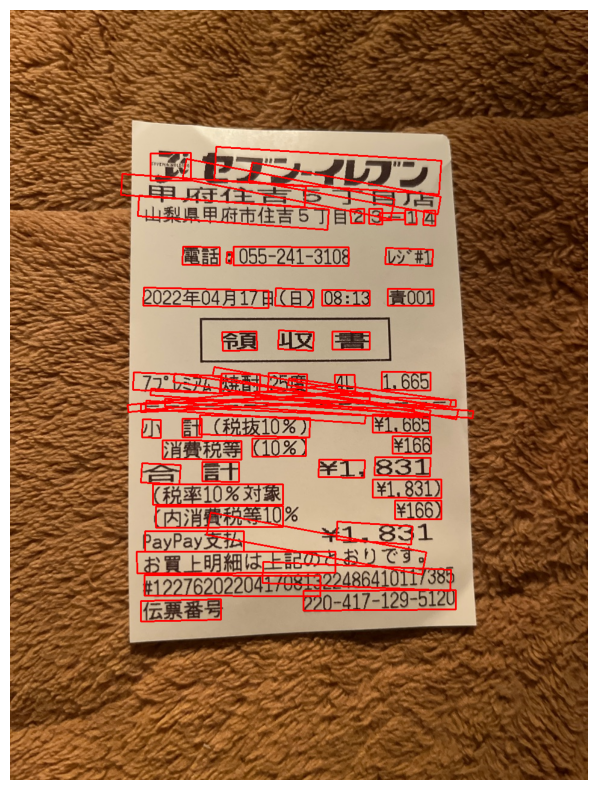

In [9]:
csv_visualize(language='japanese', id =0)

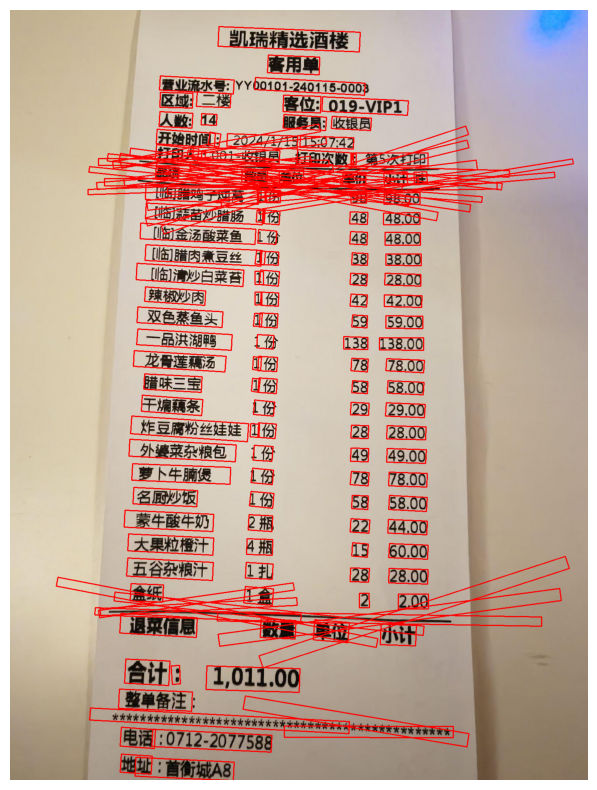

In [10]:
csv_visualize(language='chinese', id =0)

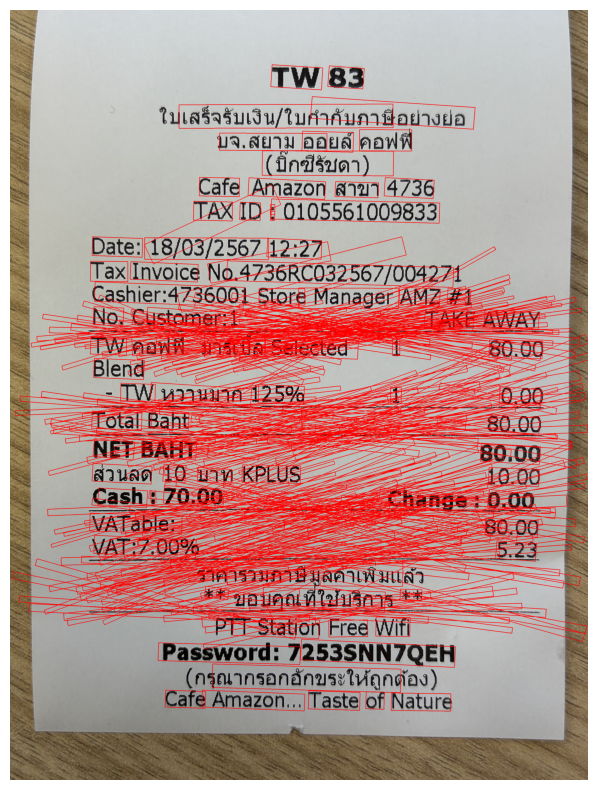

In [11]:
csv_visualize(language='thai', id =0)

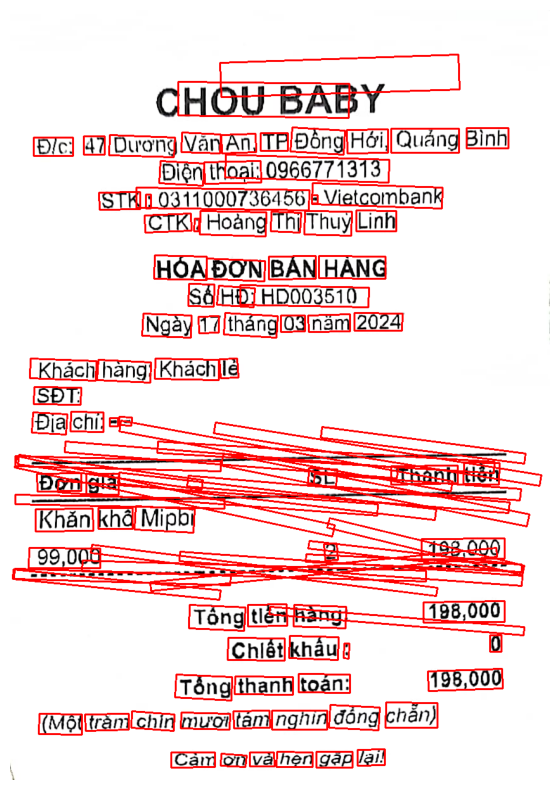

In [12]:
csv_visualize(language='vietnamese', id =0)

In [17]:
language = 'japanese'
type = 'train'

data_path = '/data/ephemeral/home/code/data/'
image_files = glob.glob(data_path + language +'_receipt/img/' + 'train' + '/*.jpg')
json_path = data_path + language +'_receipt/ufo/' + type + '.json'
with open(json_path, 'r') as json_file:
    jf = json.load(json_file)

points_list = []
for i in range(len(image_files)):
    image_name = image_files[i].split('/')[-1]
    for word in jf['images'][image_name]['words'].keys():
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)

<Axes: ylabel='Count'>

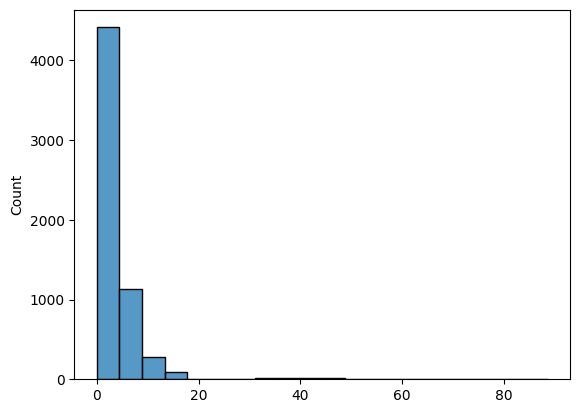

In [18]:
from scipy.spatial import distance
import seaborn as sns

w_h_ratio = []

for i in range(len(points_list)):
    width = distance.pdist(np.array(points_list[i][:2]),metric='euclidean').item()
    height = distance.pdist(np.array(points_list[i][1:3]),metric='euclidean').item()

    w_h_ratio.append(width/height)

sns.histplot(w_h_ratio,bins=20)

In [ ]:
language = 'japanese'
type = 'train'

data_path = '/data/ephemeral/home/code/data/'
image_files = glob.glob(data_path + language +'_receipt/img/' + 'test' + '/*.jpg')
json_path = 'predictions/output.csv'
with open(json_path, 'r') as json_file:
    cf = json.load(json_file)

points_list = []
for i in range(len(image_files)):
    image_name = image_files[i].split('/')[-1]
    for word in cf['images'][image_name]['words'].keys():
        points = cf['images'][image_name]['words'][word]['points']
        points_list.append(points)

<Axes: ylabel='Count'>

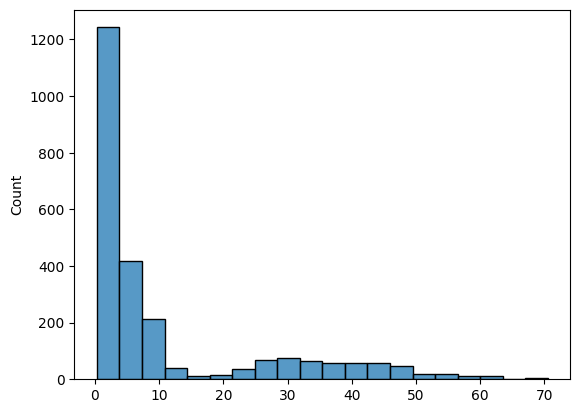

In [ ]:
from scipy.spatial import distance
import seaborn as sns

pred_w_h_ratio = []

for i in range(len(points_list)):
    width = distance.pdist(np.array(points_list[i][:2]),metric='euclidean').item()
    height = distance.pdist(np.array(points_list[i][1:3]),metric='euclidean').item()

    pred_w_h_ratio.append(width/height)

sns.histplot(pred_w_h_ratio,bins=20)

In [29]:
jf['images'][image_name]['words']

{'0': {'points': [[343.5685729980469, 132.12562561035156],
   [590.2158203125, 144.10362243652344],
   [586.691162109375, 219.38375854492188],
   [340.0445556640625, 207.4124298095703]]},
 '1': {'points': [[324.9525451660156, 274.87225341796875],
   [572.4161376953125, 285.6415100097656],
   [571.4025268554688, 309.6114807128906],
   [323.94000244140625, 298.8419189453125]]},
 '2': {'points': [[209.53829956054688, 1019.3292236328125],
   [343.1153869628906, 1022.7352905273438],
   [342.5716857910156, 1045.506591796875],
   [208.9947509765625, 1042.1002197265625]]},
 '3': {'points': [[203.94888305664062, 735.123291015625],
   [340.47161865234375, 738.3438110351562],
   [339.9691467285156, 761.0027465820312],
   [203.4451904296875, 757.7853393554688]]},
 '4': {'points': [[219.43045043945312, 996.20166015625],
   [309.9583740234375, 997.1691284179688],
   [309.72943115234375, 1018.1939086914062],
   [219.20205688476562, 1017.226806640625]]},
 '5': {'points': [[626.1726684570312, 1099.2170

In [28]:
jf['images'][image_name]['words'][word]

{'points': [[666.454833984375, 429.6023254394531],
  [675.9085693359375, 429.8551025390625],
  [675.3826904296875, 449.8293762207031],
  [665.9288330078125, 449.5765686035156]]}

In [ ]:
points_list

[[[223.5389404296875, 939.2833251953125],
  [515.9759521484375, 940.3331298828125],
  [515.8365478515625, 974.5850219726562],
  [223.401123046875, 973.5381469726562]],
 [[487.51202392578125, 965.8394775390625],
  [740.44677734375, 964.1497192382812],
  [740.66650390625, 996.8112182617188],
  [487.7333984375, 998.5031127929688]],
 [[242.62530517578125, 825.4849243164062],
  [453.3987121582031, 824.9317016601562],
  [453.4968566894531, 859.66796875],
  [242.72256469726562, 860.2205810546875]],
 [[210.94412231445312, 900.625],
  [540.6194458007812, 900.17431640625],
  [540.836669921875, 935.8086547851562],
  [211.15994262695312, 936.25732421875]],
 [[224.5278778076172, 866.667236328125],
  [388.24395751953125, 866.7963256835938],
  [388.217529296875, 900.1458740234375],
  [224.50143432617188, 900.016357421875]],
 [[237.94232177734375, 788.785888671875],
  [453.8902587890625, 788.6219482421875],
  [453.86688232421875, 822.2740478515625],
  [237.92044067382812, 822.4386596679688]],
 [[420.5